### Open Dataset 1: Activity guide

In [43]:
#!pip install PyPDF2
import PyPDF2
pdfFileObj = open('Activity_Guide.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pdfReader.numPages

74

In [50]:
pageObject = pdfReader.getPage(14)

In [52]:
#print(pageObject.extractText())

In [ ]:
pdfFileObject.close()

In [ ]:
# Load your PDF
with open("Activity_Guide.pdf", "rb") as f:
    pdf = pdftotext.PDF(f)

In [ ]:
# Save all text to a txt file.
with open('Activities_Guide.txt', 'w') as f:
    f.write("\n\n".join(pdf))

### Analysis

In [1]:
# Basic Python Library
import pandas as pd 
import re
import string

In [30]:
open_data_1 = pd.read_csv('Activities_Guide.csv', low_memory=False)
open_data_1.shape

(37, 4)

In [6]:
open_data_1.columns

Index(['Age', 'Name', 'Activity', 'Result'], dtype='object')

In [7]:
open_data_1.head()

,Age,Name,Activity,Result
0,Babies,Board Puzzle,• Taking the puzzle pieces out will be the fir...,Infants are learning to use their eyes to help...
1,toddler,Board Puzzle,• Caregiver explains that puzzle pieces come i...,"• Children concentrate and are quiet, but thei..."
2,Babies,Chain Puzzle,• Place the individual pieces in front of the ...,• Babies can reach for an object. • Babies can...
3,toddler,Chain Puzzle,"• Let the children play freely, taking the puz...",• Children can take things apart and put them ...
4,Babies,Board Book,• Talk to infants as much as you can. • Listen...,"• Infants become emotionally, physically, and ..."


In [8]:
open_data_1.Name.unique()

array(['Board Puzzle', 'Chain Puzzle', 'Board Book', 'Sponge Balls',
       'Shape Sorter', 'Paper and Crayons', 'Stringing Beads', 'Puppets',
       'Stacking and Sort Kit', 'Dominoes', 'Construction Blocks',
       'Modeling Clay', 'Puzzle Blocks', 'Memory Game', 'Counting Circle',
       'Jigsaw Puzzles'], dtype=object)

In [11]:
open_data_1.Name.value_counts()

Paper and Crayons        3
Stacking and Sort Kit    3
Board Book               3
Stringing Beads          3
Puppets                  3
Shape Sorter             3
Sponge Balls             3
Modeling Clay            2
Puzzle Blocks            2
Construction Blocks      2
Dominoes                 2
Board Puzzle             2
Chain Puzzle             2
Memory Game              2
Jigsaw Puzzles           1
Counting Circle          1
Name: Name, dtype: int64

In [13]:
open_data_1.Activity.unique()

array(['• Taking the puzzle pieces out will be the first skill that infant will master quite easily. Banging the puzzle pieces together or on the floor is also a lot of fun because it makes a lot of noise, which infants love. • Let the infant explore how to identify and scan the puzzle piece and the outline of the hole where it belongs. • Observe how the infant matches the picture of the puzzle piece and the hole where it belongs. • Encourage children by talking and referring to the colors and shapes of the puzzle.',
       '• Caregiver explains that puzzle pieces come in different shapes and sizes. Some pieces have bumps with rounded corners. • Ask a child or a group of children to complete the puzzle; ask them to memorize where each piece fits. • Form a group of children and challenge them to complete the puzzle as fast as they can. Everyone should participate in completing the puzzle.',
       '• Place the individual pieces in front of the baby. Let her reach for and hold the puzzle

In [31]:
re_dict = {'•': ''}
open_data_1['clean_activity']=open_data_1["Activity"].str.replace('•','').str.strip()

In [32]:
open_data_1.head()

,Age,Name,Activity,Result,clean_activity
0,Babies,Board Puzzle,• Taking the puzzle pieces out will be the fir...,Infants are learning to use their eyes to help...,Taking the puzzle pieces out will be the first...
1,toddler,Board Puzzle,• Caregiver explains that puzzle pieces come i...,"• Children concentrate and are quiet, but thei...",Caregiver explains that puzzle pieces come in ...
2,Babies,Chain Puzzle,• Place the individual pieces in front of the ...,• Babies can reach for an object. • Babies can...,Place the individual pieces in front of the ba...
3,toddler,Chain Puzzle,"• Let the children play freely, taking the puz...",• Children can take things apart and put them ...,"Let the children play freely, taking the puzzl..."
4,Babies,Board Book,• Talk to infants as much as you can. • Listen...,"• Infants become emotionally, physically, and ...",Talk to infants as much as you can. Listen to...


In [33]:
open_data_1['clean_result']=open_data_1["Result"].str.replace('•','').str.strip()
    

In [34]:
open_data_1['clean_activity'][1]

'Caregiver explains that puzzle pieces come in different shapes and sizes. Some pieces have bumps with rounded corners.  Ask a child or a group of children to complete the puzzle; ask them to memorize where each piece fits.  Form a group of children and challenge them to complete the puzzle as fast as they can. Everyone should participate in completing the puzzle.'

In [35]:
open_data_1.head()

,Age,Name,Activity,Result,clean_activity,clean_result
0,Babies,Board Puzzle,• Taking the puzzle pieces out will be the fir...,Infants are learning to use their eyes to help...,Taking the puzzle pieces out will be the first...,Infants are learning to use their eyes to help...
1,toddler,Board Puzzle,• Caregiver explains that puzzle pieces come i...,"• Children concentrate and are quiet, but thei...",Caregiver explains that puzzle pieces come in ...,"Children concentrate and are quiet, but their ..."
2,Babies,Chain Puzzle,• Place the individual pieces in front of the ...,• Babies can reach for an object. • Babies can...,Place the individual pieces in front of the ba...,Babies can reach for an object. Babies can fi...
3,toddler,Chain Puzzle,"• Let the children play freely, taking the puz...",• Children can take things apart and put them ...,"Let the children play freely, taking the puzzl...",Children can take things apart and put them to...
4,Babies,Board Book,• Talk to infants as much as you can. • Listen...,"• Infants become emotionally, physically, and ...",Talk to infants as much as you can. Listen to...,"Infants become emotionally, physically, and me..."


In [36]:
open_data_1.to_csv('clean_activity.csv', header =True, index = False)

In [38]:
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [39]:
text = open_data_1['clean_activity'].values 

wordcloud = WordCloud().generate(str(text))

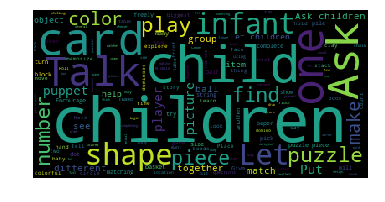

In [40]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [41]:
result = open_data_1['clean_result'].values 

wordcloud = WordCloud().generate(str(result))

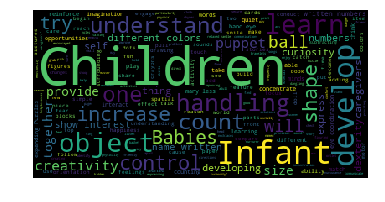

In [42]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()